## CORONA VIRUS DATA SET

## Description: 
    The dataset was provided by the government. This dataset contains an enormous number of anonymized patient-related information including pre-conditions.

## problem statement:
    the goal is to give over view on given Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

## Dataset Information:

* sex: 1 for female and 2 for male.
* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
  degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
* date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

## importing the libraries

In [46]:
# Basics libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## loading the data

In [47]:
covid = pd.read_csv('Covid Data.csv')
print('Data Shape :', covid.shape)

Data Shape : (1048575, 21)


## EDA

In [3]:
covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
covid.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


##  Checking the Number of Unique Values by column

In [49]:
for col in covid.columns : 
    print('{:<20} => {:>10}'.format(col, len(covid[col].unique())))

USMER                =>          2
MEDICAL_UNIT         =>         13
SEX                  =>          2
PATIENT_TYPE         =>          2
DATE_DIED            =>        401
INTUBED              =>          4
PNEUMONIA            =>          3
AGE                  =>        121
PREGNANT             =>          4
DIABETES             =>          3
COPD                 =>          3
ASTHMA               =>          3
INMSUPR              =>          3
HIPERTENSION         =>          3
OTHER_DISEASE        =>          3
CARDIOVASCULAR       =>          3
OBESITY              =>          3
RENAL_CHRONIC        =>          3
TOBACCO              =>          3
CLASIFFICATION_FINAL =>          7
ICU                  =>          4


In [50]:
covid['TOBACCO'].value_counts()

2     960979
1      84376
98      3220
Name: TOBACCO, dtype: int64

In [51]:
covid['INTUBED'].value_counts()

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

In [9]:
covid['PREGNANT'].value_counts()

97    523511
2     513179
1       8131
98      3754
Name: PREGNANT, dtype: int64

In [52]:
covid['ICU'].value_counts()

97    848544
2     175685
1      16858
99      7488
Name: ICU, dtype: int64

it is observed that INTUBED, PREGNANT, ICU  have many missing values, and other columns have smaller missing values.

In [53]:
covid['CLASIFFICATION_FINAL'].value_counts()

7    499250
3    381527
6    128133
5     26091
1      8601
4      3122
2      1851
Name: CLASIFFICATION_FINAL, dtype: int64

classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
  degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.

### Data Preprocessing

Treating the missing values


In [56]:
covid.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [57]:
cols = ['PNEUMONIA','DIABETES', 'COPD', 'ASTHMA', 'INMSUPR','HIPERTENSION', 
        'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY','RENAL_CHRONIC', 'TOBACCO']
for col in cols :
    covid = covid[(covid[col] == 1)|(covid[col] == 2)]

'DATE_DIED' column to binary 'DEATH' column

In [58]:
covid['DEATH'] = [2 if row=='9999-99-99' else 1 for row in covid['DATE_DIED']]

In [59]:
covid['DEATH'].value_counts()

2    950438
1     74714
Name: DEATH, dtype: int64

In [60]:
covid.drop(columns=['INTUBED','ICU','DATE_DIED'],inplace=True)

In [61]:
print('MALE',covid.query('SEX==2')['PREGNANT'].value_counts(), '\n')
print('FEMALE',covid.query('SEX==1')['PREGNANT'].value_counts(), '\n')

MALE 97    511936
Name: PREGNANT, dtype: int64 

FEMALE 2     502200
1       7841
98      3175
Name: PREGNANT, dtype: int64 



In [62]:
covid['PREGNANT'] = covid['PREGNANT'].replace(97,2)
covid['PREGNANT'] = covid['PREGNANT'].replace(98,2)

**Check the Dataset after preprocessing :**

In [63]:
covid.shape

(1025152, 19)

*  The DataFrame length reduced from 1,048,575 to 1,025,152 after preprocessing

In [64]:
for col in covid.columns : 
    print('{:<20} => {:>10}'.format(col, len(covid[col].unique())))

USMER                =>          2
MEDICAL_UNIT         =>         13
SEX                  =>          2
PATIENT_TYPE         =>          2
PNEUMONIA            =>          2
AGE                  =>        121
PREGNANT             =>          2
DIABETES             =>          2
COPD                 =>          2
ASTHMA               =>          2
INMSUPR              =>          2
HIPERTENSION         =>          2
OTHER_DISEASE        =>          2
CARDIOVASCULAR       =>          2
OBESITY              =>          2
RENAL_CHRONIC        =>          2
TOBACCO              =>          2
CLASIFFICATION_FINAL =>          7
DEATH                =>          2


## Data Visualization, EDA

[Text(0, 0, '74714'), Text(0, 0, '950438')]

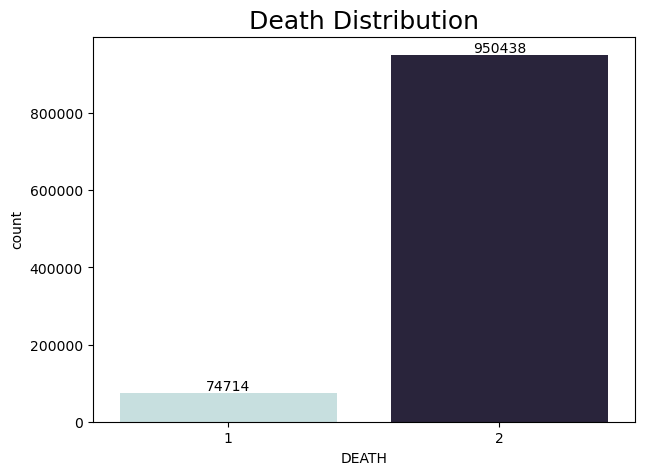

In [66]:
import  matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
plt.title('Death Distribution', fontsize=18)
ax = sns.countplot(x= covid['DEATH'], palette="ch:start=.2,rot=-.3")
plt.bar_label(ax.containers[0])

##### palette - color palette 

<Axes: title={'center': 'Age Distribution'}, xlabel='AGE', ylabel='Count'>

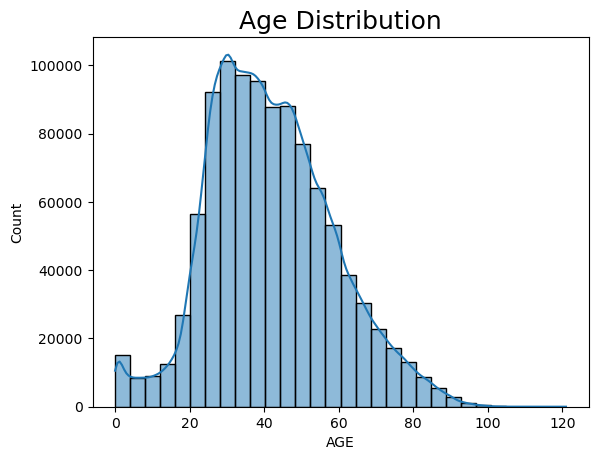

In [71]:
plt.title('Age Distribution', fontsize=18)
sns.histplot(data=covid, x=covid['AGE'],bins=30, kde=True)

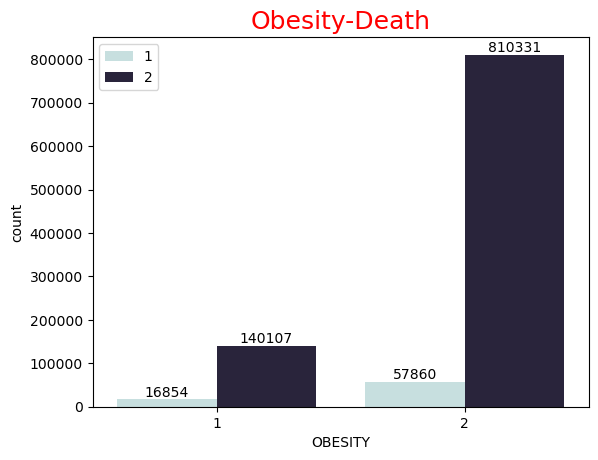

In [69]:
ax=sns.countplot(x = covid.OBESITY,hue=covid.DEATH, palette='ch:start=.2,rot=-.3')
plt.title("Obesity-Death",fontsize=18, color="red")
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
plt.legend(loc="best");

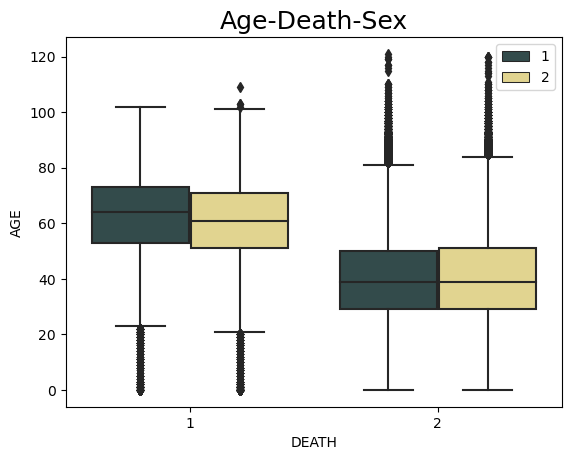

In [72]:
sns.boxplot(x="DEATH", y="AGE",hue="SEX",data=covid,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-Death-Sex",fontsize=18)
plt.legend(loc="best")

 ##### note :
 1 - female ,
 2- male.

## heat map to finfd the correlation between features.

Text(0.5, 1.0, 'Correlation Between Features')

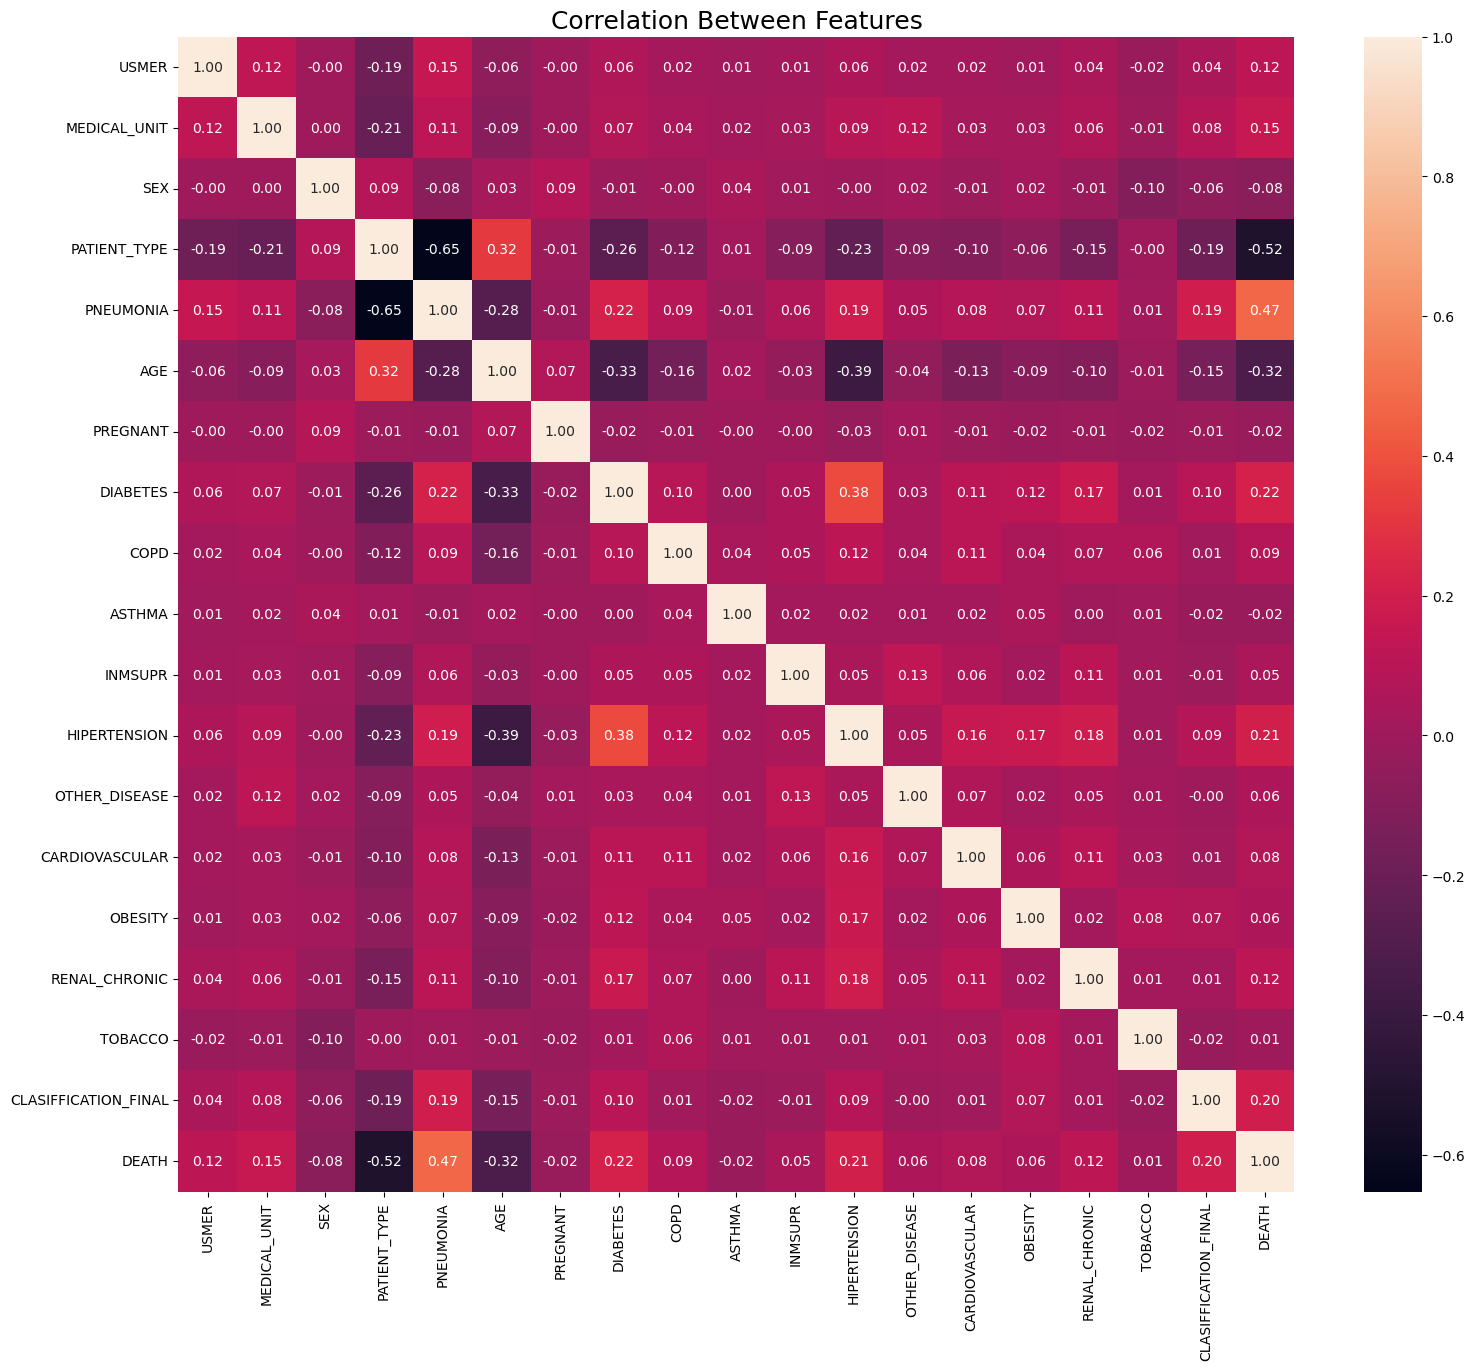

In [70]:
plt.figure(figsize=(18,15))
sns.heatmap(covid.corr(), annot=True, fmt='.2f')
plt.title('Correlation Between Features', fontsize=18)

* Drop values that doesn't have a **positive correlataion with DEATH column**

In [73]:
y = covid['DEATH']
x = covid.drop('DEATH', axis=1)

#### train , test and split

In [74]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size=0.2, random_state=42)

print('Train X :', train_x.shape)
print('Test X :', test_x.shape)
print('Train Y :', train_y.shape)
print('Test Y :', test_y .shape)

Train X : (820121, 18)
Test X : (205031, 18)
Train Y : (820121,)
Test Y : (205031,)


## Training the Model

In [75]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x, train_y)
print("Logistic Regression Accuracy :", log_reg.score(test_x, test_y))

Logistic Regression Accuracy : 0.9382093439528657


In [76]:
from sklearn.metrics import f1_score

print("Logistic Regression F1 Score : ", f1_score(test_y, log_reg.predict(test_x),average=None))

Logistic Regression F1 Score :  [0.50385745 0.96705303]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

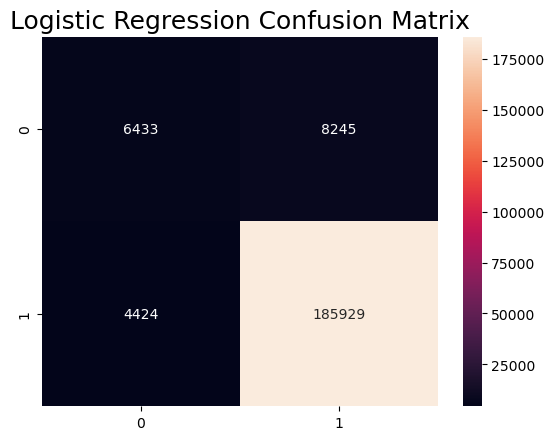

In [77]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_y, log_reg.predict(test_x)), annot=True, fmt='.0f')
plt.title("Logistic Regression Confusion Matrix", fontsize=18)

Text(0.5, 1.0, 'Death Distribution')

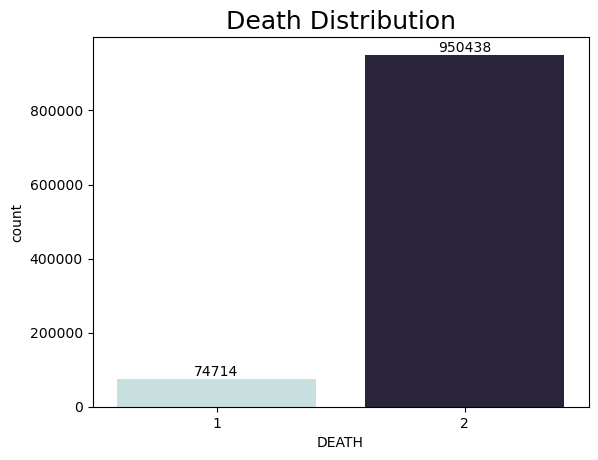

In [78]:
ax = sns.countplot(x=covid['DEATH'],palette='ch:start=.2,rot=-.3')
plt.bar_label(ax.containers[0])
plt.title('Death Distribution', fontsize=18)

* There is an imbalance Dataset Problem
* Use Undersampling method to balance out the dataset

Undersampling is a technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class.

In [79]:
from imblearn.under_sampling import RandomUnderSampler

rand_under = RandomUnderSampler(random_state=0)
x_resampled, y_resampled = rand_under.fit_resample(x,y)

Text(0.5, 1.0, 'Death Distribution After Resampling')

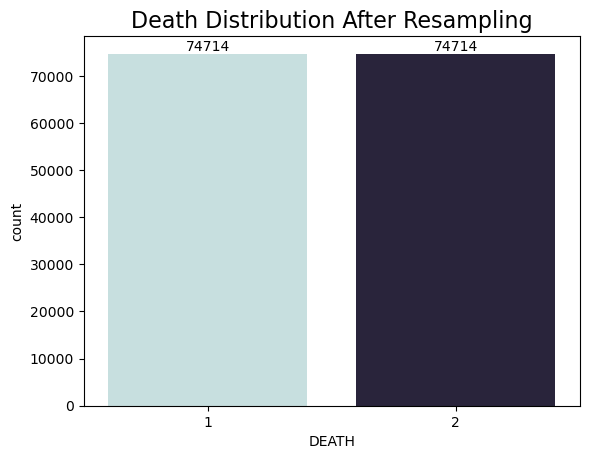

In [80]:
ax = sns.countplot(x=y_resampled,palette='ch:start=.2,rot=-.3')
plt.bar_label(ax.containers[0])
plt.title("Death Distribution After Resampling", fontsize=16)

### Train the model after undersampling

In [81]:
train_x, test_x, train_y, test_y = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)
print('Train X :', train_x.shape)
print('Test X :', test_x.shape)
print('Train Y :', train_y.shape)
print('Test Y :', test_y .shape)

Train X : (119542, 18)
Test X : (29886, 18)
Train Y : (119542,)
Test Y : (29886,)


In [82]:
log_reg.fit(train_x, train_y)
print("Logistic Regression Accuracy :", log_reg.score(test_x, test_y))

Logistic Regression Accuracy : 0.9102589841397309


In [83]:
from sklearn.metrics import f1_score

print("Logistic Regression F1 Score : ", f1_score(test_y, log_reg.predict(test_x),average=None))

Logistic Regression F1 Score :  [0.91153186 0.90894894]


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

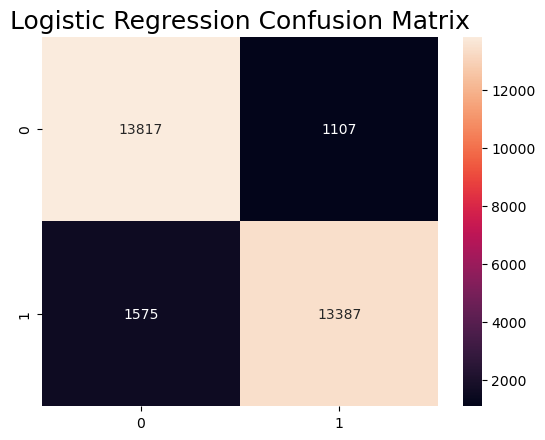

In [84]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(test_y, log_reg.predict(test_x)), annot=True, fmt='.0f')
plt.title("Logistic Regression Confusion Matrix", fontsize=18)

# Conclusion

* predict patients who are at high risk of death from covid
* uses undersampling method to solve imbalance dataset problem
* tested logistic regression and random forest algorithm
* logistic regression seemed to have better sensitivity than random forest